In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt



In [11]:
# Define the states
states = ["Sunny", "Cloudy", "Rainy"]

# Define the transition matrix
# P[i][j] is the probability of transitioning from state i to state j
transition_matrix = np.array([
    #sunny cloudy rainy
    [0.8, 0.1, 0.1],  # to Sunny
    [0.3, 0.4, 0.3],  # to Cloudy
    [0.2, 0.5, 0.3]   # to Rainy
])

# Function to simulate the Markov chain
def simulate_markov_chain(transition_matrix, states, num_steps, initial_state):
    current_state = initial_state
    state_sequence = [current_state]

    for _ in range(num_steps):
        current_state_index = states.index(current_state)
        print(current_state_index)
        next_state_index = np.random.choice(len(states), p=transition_matrix[current_state_index])
        print(next_state_index)
        current_state = states[next_state_index]
        print(current_state)
        state_sequence.append(current_state)
    print(f'state_sequence:{state_sequence}')
    return state_sequence

# Function to calculate state probabilities
def calculate_state_probabilities(state_sequence, states):
    state_counts = {state: 0 for state in states}
    for state in state_sequence:
        state_counts[state] += 1
    total_states = len(state_sequence)
    state_probabilities = {state: count / total_states for state, count in state_counts.items()}
    return state_probabilities


In [12]:

# Parameters
num_steps = 10  # Number of steps to simulate
initial_state = "Sunny"  # Starting state

# Simulate the Markov chain
state_sequence = simulate_markov_chain(transition_matrix, states, num_steps, initial_state)




0
0
Sunny
0
0
Sunny
0
2
Rainy
2
0
Sunny
0
0
Sunny
0
2
Rainy
2
1
Cloudy
1
1
Cloudy
1
0
Sunny
0
0
Sunny
state_sequence:['Sunny', 'Sunny', 'Sunny', 'Rainy', 'Sunny', 'Sunny', 'Rainy', 'Cloudy', 'Cloudy', 'Sunny', 'Sunny']


In [14]:
# Print the results
print("State sequence:", state_sequence)

# Display the transition matrix
print("\nTransition Matrix:")
print("From \\ To", "\t".join(states))
for i, state in enumerate(states):
    print(state, "\t", "\t".join(f"{transition_matrix[i][j]:.2f}" for j in range(len(states))))



State sequence: ['Sunny', 'Sunny', 'Sunny', 'Rainy', 'Sunny', 'Sunny', 'Rainy', 'Cloudy', 'Cloudy', 'Sunny', 'Sunny']

Transition Matrix:
From \ To Sunny	Cloudy	Rainy
Sunny 	 0.80	0.10	0.10
Cloudy 	 0.30	0.40	0.30
Rainy 	 0.20	0.50	0.30


In [15]:
# Calculate and display state probabilities
state_probabilities = calculate_state_probabilities(state_sequence, states)
print("\nState Probabilities after Simulation:")
for state, prob in state_probabilities.items():
    print(f"{state}: {prob:.2f}")




State Probabilities after Simulation:
Sunny: 0.64
Cloudy: 0.18
Rainy: 0.18


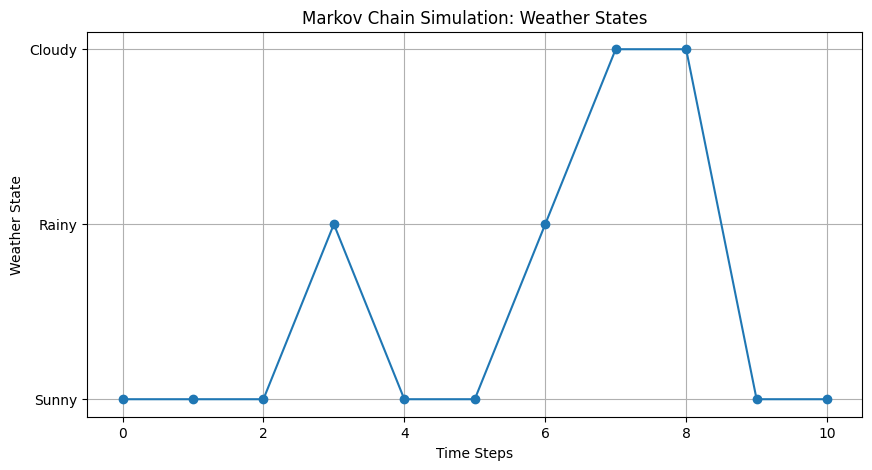

In [16]:
# Visualize the results
plt.figure(figsize=(10, 5))
plt.plot(state_sequence, marker='o')
plt.title('Markov Chain Simulation: Weather States')
plt.xlabel('Time Steps')
plt.ylabel('Weather State')
plt.yticks(states)
plt.grid()
plt.show()